# RGB to HSV

In [76]:
import cv2
import matplotlib.pyplot as plt
from utils import calculate_histogram_distance, normalize_histogram

### Load Lenna

In [77]:
lenna_image = cv2.imread('Lenna.png')
lenna_full_image = cv2.imread('Lenna_full.jpeg')
iguana_image = cv2.imread('iguana_wiki.jpeg')

### Convert BGR to HSV

In [78]:
lenna_hsv = cv2.cvtColor(lenna_image, cv2.COLOR_BGR2HSV)

### Seperate the HSV image to each channel

In [79]:
h_channel, s_channel, v_channel = cv2.split(lenna_hsv)

### Display each channel

In [80]:
cv2.imwrite('H_Channel.png', h_channel)
cv2.imwrite('S_Channel.png', s_channel)
cv2.imwrite('V_Channel.png', v_channel)

bgr_lenna = cv2.cvtColor(lenna_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite('bgr_lenna.png', bgr_lenna)

True

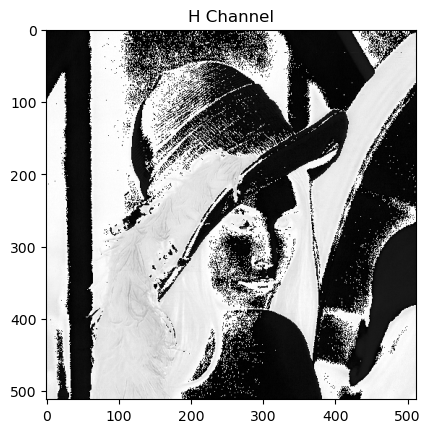

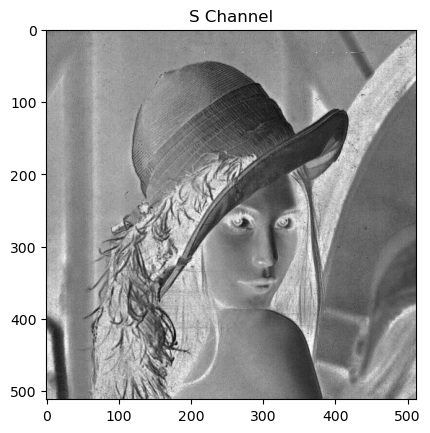

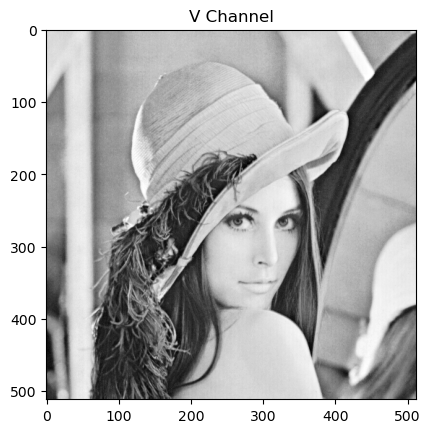

In [81]:
plt.figure()
plt.title("H Channel")
plt.imshow(h_channel, cmap='gray')

plt.figure()
plt.title("S Channel")
plt.imshow(s_channel, cmap='gray')

plt.figure()
plt.title("V Channel")
plt.imshow(v_channel, cmap='gray')

### Gray lenna

In [82]:
gray_lenna = cv2.cvtColor(bgr_lenna, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray_lenna.png', gray_lenna)

True

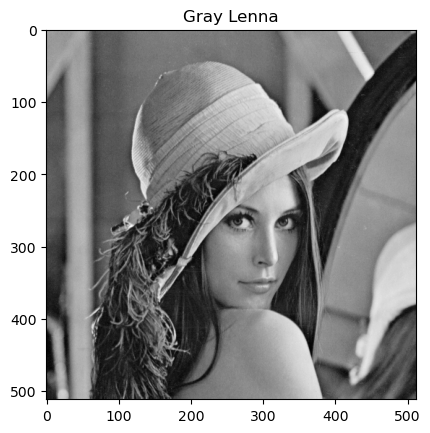

In [83]:
plt.figure()
plt.title("Gray Lenna")
plt.imshow(gray_lenna, cmap='gray')

### Thresholding for the binarization

In [84]:
threshold_value = 127

### Binarization based on the threshold

In [85]:
ret, binary_lenna = cv2.threshold(gray_lenna, threshold_value, 255, cv2.THRESH_BINARY)
cv2.imwrite('binary_lenna.png', binary_lenna)

True

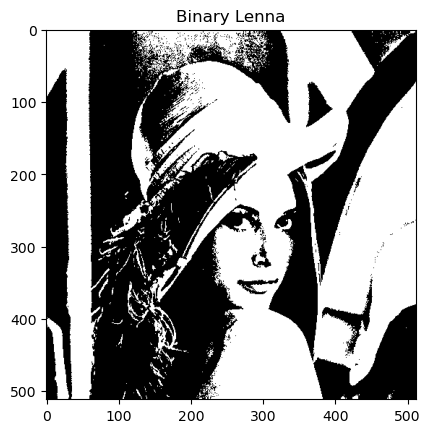

In [86]:
plt.figure()
plt.title("Binary Lenna")
plt.imshow(binary_lenna, cmap='gray')

### Get image histogram

In [87]:
histogram_lenna = cv2.calcHist([gray_lenna], [0], None, [256], [0, 256])

### Histogram plot

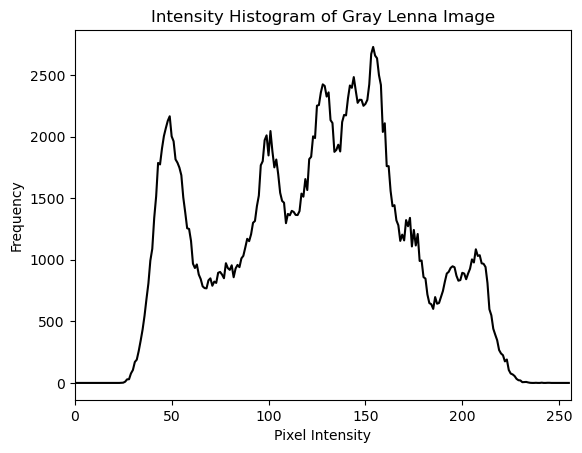

In [88]:
plt.figure()
plt.title("Intensity Histogram of Gray Lenna Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(histogram_lenna, color='black')
plt.xlim([0, 256])
plt.savefig('histogram.png')

### Get image histogram for other two images

In [89]:
gray_lenna_full = cv2.cvtColor(lenna_full_image, cv2.COLOR_BGR2GRAY)
gray_iguana = cv2.cvtColor(iguana_image, cv2.COLOR_BGR2GRAY)

In [90]:
histogram_lenna_full = cv2.calcHist([gray_lenna_full], [0], None, [256], [0, 256])
histogram_iguana = cv2.calcHist([gray_iguana], [0], None, [256], [0, 256])

### Normalization

In [91]:
nhistogram_lenna = normalize_histogram(histogram_lenna)
nhistogram_lenna_full = normalize_histogram(histogram_lenna_full)
nhistogram_iguana = normalize_histogram(histogram_iguana)

sim_lenna_lenna_full = calculate_histogram_distance(nhistogram_lenna, nhistogram_lenna_full)
sim_lenna_iguana = calculate_histogram_distance(nhistogram_lenna, nhistogram_iguana)

print(sim_lenna_lenna_full, sim_lenna_iguana)

0.1274987663811257 0.3009597839959198


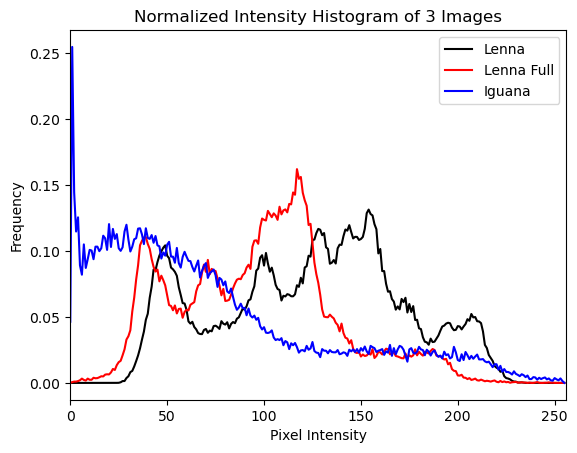

In [92]:
plt.figure()
plt.title("Normalized Intensity Histogram of 3 Images")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(nhistogram_lenna, color='black', label='Lenna')
plt.plot(nhistogram_lenna_full, color='red', label='Lenna Full')
plt.plot(nhistogram_iguana, color='blue', label='Iguana')
plt.xlim([0, 256])
plt.legend()